In [1]:
import pickle
import cv2
import matplotlib.pyplot as plt

In [31]:
Images=pickle.load(open("Images.pkl",'rb'))


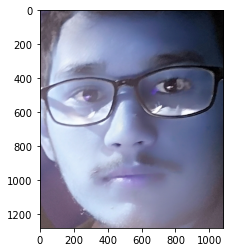

In [32]:
plt.imshow(Images[10])

In [5]:
values=[]

In [34]:
for i in range(len(Images)):
    Images[i]=cv2.resize(Images[i],(200,200))

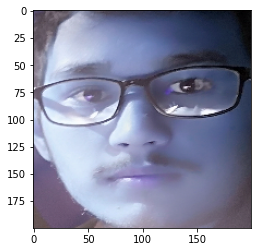

In [35]:
plt.imshow(Images[10])

In [43]:

Images[1].shape

(200, 200, 3)

In [36]:
#creating model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten
from tensorflow.keras.applications.vgg16 import VGG16

In [60]:

#model.add(Conv2D(32,(3,3),activation='relu',input_shape=(2003)))
model=Sequential()
model.add(VGG16(include_top=False,input_shape=(200,200,3)))

model.add(Flatten())
#model.add(Dense(240,activation="relu"))
#model.add(Dense(360,activation="relu"))
#model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
Total params: 14,714,688
Trainable params: 14,714,688
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [27]:
model.fit(x,y,epochs=4)

Epoch 1/4
4/4 [==============================] - 7s 2s/step - loss: 26249.5938 - accuracy: 0.2734
Epoch 2/4
4/4 [==============================] - 7s 2s/step - loss: 11403.5283 - accuracy: 0.2891
Epoch 3/4
4/4 [==============================] - 7s 2s/step - loss: 7803.1270 - accuracy: 0.2578
Epoch 4/4
4/4 [==============================] - 7s 2s/step - loss: 3960.2349 - accuracy: 0.2734


In [50]:
import numpy as np
Images=np.array(Images)


In [61]:
predictions=model.predict(Images)

In [67]:
predictions[1][10]

0.0

In [70]:
maxv=[]
minv=[]
for i in predictions[1]:
    maxv.append(i)
    minv.append(i)
for i in range(len(predictions)):
    for y in range(18432):
        if(predictions[i][y]>maxv[y]):
            maxv[y]=predictions[i][y]
        elif(predictions[i][y]<maxv[y]):
            predictions[i][y]=maxv[y]
        
        

In [53]:
#radCalculation

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     